In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA8_082319_03.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA8_082319_03.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
    #Spectrum
    filtered = MSExperiment()
    for s in exp:
        if s.getMSLevel() == 2:
            filtered.addSpectrum(s)

    def plotSpectrun(index):
        fig = plt.subplots(figsize =(5, 4))
        FirstSpectra = exp[index]
        mz, intensity = FirstSpectra.get_peaks()
        p = plt.bar(mz, intensity,snap=True,color ="r")
        plt.title("MS level :" + str(FirstSpectra.getMSLevel()))
        plt.ylabel('Intensity')
        plt.xlabel('m/z')
        plt.show()
    plotSpectrun(2)


Peptide ID m/z: 485.236114501953
Peptide ID rt: 490.09180000002004
Peptide scan index: 656
Peptide ID score type: hyperscore
Peptide ID m/z: 923.396606445313
Peptide ID rt: 845.64799999998
Peptide scan index: 1803
Peptide ID score type: hyperscore
Peptide ID m/z: 741.353881835938
Peptide ID rt: 1001.33569999998
Peptide scan index: 2357
Peptide ID score type: hyperscore
Peptide ID m/z: 745.362365722656
Peptide ID rt: 1255.28329999998
Peptide scan index: 3197
Peptide ID score type: hyperscore
Peptide ID m/z: 705.334350585938
Peptide ID rt: 1538.6686999999802
Peptide scan index: 4278
Peptide ID score type: hyperscore
Peptide ID m/z: 742.845886230469
Peptide ID rt: 1618.0239000000001
Peptide scan index: 4598
Peptide ID score type: hyperscore
Peptide ID m/z: 720.336730957031
Peptide ID rt: 1641.35299999998
Peptide scan index: 4694
Peptide ID score type: hyperscore
Peptide ID m/z: 733.853881835938
Peptide ID rt: 1662.5181
Peptide scan index: 4782
Peptide ID score type: hyperscore
Peptide ID 

Number of matched peaks: 30
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b4++	2	195.096297778371	195.1007080078125
b5++	2	223.60702982622098	223.13671875
b2+	1	231.11617577097104	231.04603576660156
y4++	2	255.631559525021	255.23681640625
y2+	1	262.13974907287104	262.1883850097656
b3+	1	288.13763986667107	288.18328857421875
b6++	2	297.14123696977094	296.9466857910156
y5++	2	312.173591700471	312.1458435058594
y6++	2	361.707798844021	362.1905822753906
y3+	1	363.18742829617105	363.16595458984375
b4+	1	389.1853190899711	389.27215576171875
y7++	2	405.223813423771	404.97998046875
b8++	2	410.1889161930709	410.19110107421875
y8++	2	462.737285503521	463.19952392578125
b9++	2	467.7023882728209	468.05029296875
y4+	1	510.25584258327103	510.168701171875
b10++	2	511.2184028525709	511.3726806640625
y10++	2	575.784964726821	575.6184692382812
b6+	1	593.275197472771	593.5740966796875
b12++	2	617.2946421715709	617.5347290039062
y5+	1	623.3399069341709

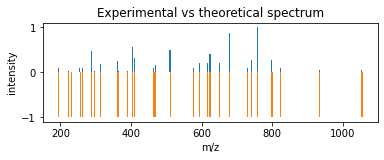

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

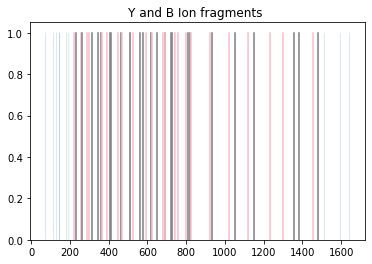

In [3]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="r")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="b")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


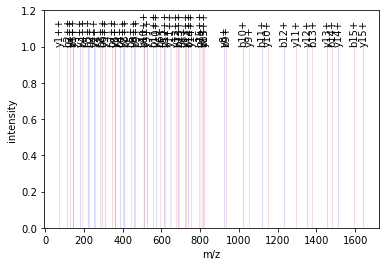

In [4]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [1]:
#Proteolytic Digestion with Trypsin
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    for e in result:
        print(e.toString())
    print(len(result)) 
    c=c+1
lis=[]
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_b_ions","true")
    p.setValue("add_y_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    lis.append(spec1)
    print("Spectrum 1 of",peptide,"has",lis[0].size(),"peaks")
  
  

sequence:  0
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEWLAVGGYGER
R
ERPAR
HGDR
VPHHR
HPER
R
GVR
AGGR
R
R
GHPR
AGPHDQQDEEHQR
RPDLQPLPAEPR
DGLR
LLPLR
HLPQR
LR
EPLPAR
HQQR
R
LHQHPHR
EVR
GR
R
R
AAR
ELQLPLR
GRPR
DR
R
LQGDGHR
LPR
GQR
DLHR
QDHPQQR
HR
GAPAPHGR
41
sequence:  1
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEMAR
CR
R
IWR
ATR
AACPPWR
SSAASPAP
10
sequence:  2
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSENGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYLLSHVMGYGFYHFGTYPSGYENPFLHAINNGGYTNTR
IEK
YEDGGVLHVSFSYR
YEAGR
VIGDFK
VMGTGFPEDSVIFTDK
IIR
SNATVEHLHPMGDNDLDGSFTR
TFSLR
DGGYYSSVVDSHMHFK
SAIHPSILQNGGPMFAFR
R
VEEDHSNTELGIVEYQHAFK
TPDADAGEE
22
sequence:  3
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYL

In [2]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA8_082319_03.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA8_082319_03.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)


for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)
    # align both spectra
        spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
        print("Number of matched peaks: " + str(len(alignment)))
        print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
        print(50*"-")
        for theo_idx, obs_idx in alignment:
            ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(theo_spectrum[theo_idx].getMZ())
                  + "\t" + str(experiment_spectrum[obs_idx].getMZ()))


Peptide ID m/z: 485.236114501953
Peptide ID rt: 490.09180000002004
Peptide scan index: 656
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSETLAVGGYGER
 - Peptide hit monoisotopic m/z: 485.23544148757105
comparsion score =  0.9999986130167111
Spectrum 1 of AGSSETLAVGGYGER has 54 peaks.
Number of matched peaks: 1
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b12++	2	547.261656615171	546.9124145507812
Peptide ID m/z: 923.396606445313
Peptide ID rt: 845.64799999998
Peptide scan index: 1803
Peptide ID score type: hyperscore
 - Peptide hit sequence: DGGYYSSVVDSHM(Oxidation)HFK
 - Peptide hit monoisotopic m/z: 922.8990556341212
comparsion score =  0.9994611732296622
Spectrum 1 of DGGYYSSVVDSHM(Oxidation)HFK has 58 peaks.
Number of matched peaks: 17
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y4++	2	289.641403953821	289.1707763671875
b6++	2	322.121556509071	321.992309570

Number of matched peaks: 22
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y8++	2	404.70103681212106	404.7017715483433
b9++	2	415.20615235997104	415.206238273432
b5+	1	432.17250726427096	432.2035686379857
b10++	2	443.71688440782106	443.71766169919067
y9++	2	461.24306898757106	461.2429267006202
b11++	2	472.22761645567107	472.22815281108245
y10++	2	518.2645330832711	518.2643675434146
y4+	1	524.246340519471	524.247133950611
b6+	1	546.215435455671	546.243323526141
b12++	2	553.7592810992211	553.7593120824833
y5+	1	581.267804615171	581.2673394910905
b13++	2	582.270013147071	582.2691801416123
y11++	2	582.7858301949211	582.7861087316854
y12++	2	626.3018447746712	626.3032200987934
y6+	1	638.289268710871	638.2655120894929
b14++	2	646.7913102587211	646.3802625219997
b7+	1	659.299499806571	659.2977565646108
y13++	2	669.8178593544212	669.785126110691
y14++	2	698.3285914022712	698.330025576087
b8+	1	730.336613966071	730.3368064667261
y7+	1	737.357

b5+	1	432.17250726427096	432.08135986328125
y9++	2	461.24306898757106	461.116943359375
b10++	2	468.22708495567105	468.26593017578125
b11++	2	496.73781700352106	496.25689697265625
y4+	1	524.246340519471	524.3038330078125
y10++	2	542.7747336311211	542.3648681640625
b12++	2	578.2694816470711	578.3184204101562
y5+	1	581.267804615171	581.3711547851562
b6+	1	595.235836551371	595.2886962890625
y11++	2	607.2960307427711	607.5121459960938
y6+	1	638.289268710871	638.1373291015625
y12++	2	650.8120453225212	650.3505249023438
b14++	2	671.3015108065711	671.3078002929688
y13++	2	694.3280599022712	694.2945556640625
b7+	1	708.319900902271	708.1256713867188
b9+	1	878.425429348871	878.5062866210938
y9+	1	921.4788615083711	921.3706665039062
Peptide ID m/z: 733.847412109375
Peptide ID rt: 2282.92570000002
Peptide scan index: 7514
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSENLAVGGYGER
 - Peptide hit monoisotopic m/z: 733.847148482021
comparsion score =  0.9999996407599868
Spectrum 1 of A

Number of matched peaks: 25
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y8++	2	404.70103681212106	404.701904736028
b9++	2	422.213977391871	422.2371962386485
b5+	1	432.17250726427096	432.20484841193024
b10++	2	450.72470943972104	450.72450840680114
y9++	2	461.24306898757106	461.2429267035888
b11++	2	479.23544148757105	479.2349010513183
y4+	1	524.246340519471	524.2471339508911
y10++	2	525.2723581151711	525.26726319676
b6+	1	560.231085519471	560.2305309506264
b12++	2	560.7671061311211	560.7671945926375
y5+	1	581.267804615171	581.2673394908832
b13++	2	589.277838178971	589.277682517872
y11++	2	589.7936552268211	589.8356142972419
y12++	2	633.3096698065712	633.3082786940496
y6+	1	638.289268710871	638.2896411188207
b14++	2	653.799135290621	653.8133851829684
b7+	1	673.315149870371	673.3153570101517
y13++	2	676.8256843863212	676.8246903451183
y14++	2	705.3364164341712	705.33760605449
y7+	1	737.3576829979711	737.3568422623817
b8+	1	744.352264

b13++	2	598.766249059921	598.5687866210938
y11++	2	599.2820661077711	599.5234375
y6+	1	638.289268710871	638.4056396484375
b14++	2	663.2875461715711	663.4265747070312
y13++	2	686.3140952672712	686.435791015625
b7+	1	692.291971632271	692.4606323242188
y7+	1	737.3576829979711	737.6046142578125
b8+	1	763.329085791771	763.3894653320312
y9+	1	921.4788615083711	921.780517578125
b11+	1	976.4404282702711	976.5615234375
y10+	1	1068.514261525471	1068.503173828125
Peptide ID m/z: 705.8447265625
Peptide ID rt: 2923.00630000002
Peptide scan index: 10688
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSEGLAVGGYGER
 - Peptide hit monoisotopic m/z: 705.3364164341712
comparsion score =  0.999279855598264
Spectrum 1 of AGSSEGLAVGGYGER has 54 peaks.
Number of matched peaks: 22
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b6++	2	245.100623913371	245.10791015625
y5++	2	291.13754054097103	291.0849304199219
b7++	2	301.642656088821	301.285278

b12++	2	546.2720241470711	546.4332275390625
b13++	2	574.782756194921	574.3557739257812
y11++	2	575.2985732427711	575.6021728515625
y5+	1	581.267804615171	581.5737915039062
y12++	2	618.8145878225212	618.455078125
y6+	1	638.289268710871	638.305419921875
b14++	2	639.3040533065711	639.1153564453125
b7+	1	644.324985902271	644.3233032226562
y13++	2	662.3306024022712	662.500732421875
y14++	2	690.8413344501212	691.07861328125
b8+	1	715.362100061771	715.3472290039062
y7+	1	737.3576829979711	737.7174682617188
y8+	1	808.3947971574711	808.3287963867188
b9+	1	814.430514348871	814.3790283203125
b10+	1	871.4519784445711	871.3092041015625
y9+	1	921.4788615083711	921.526611328125
b11+	1	928.4734425402711	928.6658935546875
y10+	1	1020.5472757954711	1020.2621459960938
Peptide ID m/z: 734.3515625
Peptide ID rt: 3466.0809
Peptide scan index: 13511
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSENLAVGGYGER
 - Peptide hit monoisotopic m/z: 733.847148482021
comparsion score =  0.99931311643668

comparsion score =  1.0000014610688726
Spectrum 1 of AGSSEALAVGGYGER has 54 peaks.
Number of matched peaks: 22
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y8++	2	404.70103681212106	404.5485128468743
b10++	2	422.213977391871	421.75891206718364
b5+	1	432.17250726427096	432.2238434904671
b11++	2	450.72470943972104	450.77155800712967
y9++	2	461.24306898757106	461.2429267021045
y10++	2	496.76162606732106	496.76058445245405
b6+	1	503.20962142377095	503.210525772005
y4+	1	524.246340519471	524.2471339502617
b12++	2	532.2563740832711	532.2769589967726
b13++	2	560.7671061311211	560.7666372045803
y11++	2	561.282923178971	561.2836153088144
y5+	1	581.267804615171	581.2721690520381
y12++	2	604.7989377587211	604.7980734031396
b7+	1	616.293685774671	616.292976225948
b14++	2	625.2884032427711	624.8416325564878
y6+	1	638.289268710871	638.2999825472491
y13++	2	648.3149523384711	648.313841636428
y14++	2	676.8256843863211	676.3544440273392
b8+	1	687.3

Number of matched peaks: 23
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b8++	2	401.690137780221	401.7144600080962
b5+	1	432.17250726427096	431.9262678586261
b9++	2	451.224344923771	451.2486065027552
y9++	2	461.24306898757106	461.5289211242427
b10++	2	479.735076971621	479.3244317172183
b11++	2	508.24580901947104	508.2452084385183
y4+	1	524.246340519471	524.2471339523281
y10++	2	554.2827256470711	554.2833218606875
y5+	1	581.267804615171	581.2836417316709
b12++	2	589.777473663021	589.8172419374637
b6+	1	618.251820583271	617.8691523209928
b13++	2	618.288205710871	617.8724353436575
y11++	2	618.8040227587211	619.2766806658643
y6+	1	638.289268710871	638.289641118164
y12++	2	662.3200373384711	662.3188384424222
b14++	2	682.809502822521	682.8111229197362
y13++	2	705.8360519182212	705.8340521730046
b7+	1	731.335884934171	731.3384904617152
y14++	2	734.3467839660711	734.3454661495605
y7+	1	737.3576829979711	737.3568422577033
y8+	1	808.39479715

Peptide scan index: 29642
Peptide ID score type: hyperscore
 - Peptide hit sequence: VM(Oxidation)GTGFPEDSVIFTDK
 - Peptide hit monoisotopic m/z: 879.916382729821
comparsion score =  0.999437145812177
Spectrum 1 of VM(Oxidation)GTGFPEDSVIFTDK has 58 peaks.
Number of matched peaks: 39
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b4++	2	203.093755278371	203.10565185546875
b2+	1	247.11109077097103	247.16793823242188
y4++	2	255.63155952502103	255.21368408203125
y2+	1	262.13974907287104	262.11102294921875
b3+	1	304.13255486667106	304.2030944824219
b6++	2	305.13869446977094	305.15185546875
y5++	2	312.173591700471	312.2455749511719
b7++	2	353.6650765814209	353.25006103515625
y6++	2	361.707798844021	361.2364196777344
y3+	1	363.18742829617105	363.31024169921875
y7++	2	405.223813423771	405.3736572265625
b8++	2	418.1863736930709	418.21990966796875
b5+	1	462.20169818567103	462.33953857421875
b9++	2	475.6998457728209	475.36370849609375
y4+	1	51